<a href="https://colab.research.google.com/github/Mahanama90/ceri8211globalgeophysics./blob/master/HW6_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 06/ 6a and 6b / Reproducing a graph / A.Mahanama

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive # Mounting Google Drivre locally 'https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd'
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Question 6/ Part (a)

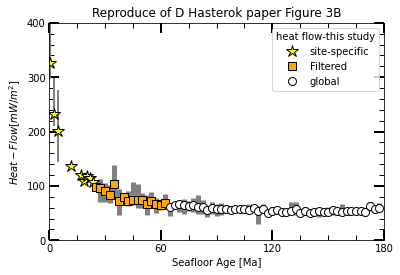

In [10]:
# Read excel files
df = pd.read_excel (r'/content/drive/My Drive/Global_HW6/Data2.xlsx', sheet_name='Site-Sp') 
df1 = pd.read_excel (r'/content/drive/My Drive/Global_HW6/Data2.xlsx', sheet_name='Filtered') 
df2 = pd.read_excel (r'/content/drive/My Drive/Global_HW6/Data2.xlsx', sheet_name='Unfiltered') 
df3 = pd.read_excel (r'/content/drive/My Drive/Global_HW6/Data2.xlsx', sheet_name='GDHI') 

# Read column by column 
Site_Corrected_Q2 = df['Q2.1']
Site_Age_Min = df['Min']

Filtered_Corrected_Q2 = df1['Q2.1']
Filtered_Age_Min = df1['Min']

UnFiltered_Corrected_Q2 = df2['Q2.1']
UnFiltered_Age_Min = df2['Min']

# Formated data set "GDHI" , Using it to produce error bard and fit GDHI model
GDHI_Q = df3['GDHI']
GDHI_Age_Min = df3['Age_Min']

# Interquartile range calculations for Site data and the rest of the data
y = df3['Q2']
x = df3['Age_Min']
Q1 = df3['Q1']
Q3 = df3['Q3']
yplus = Q3-y
yminus = y- Q1
y1 = y[0:9]
x1 = x[0:9]
Q1_site = Q1[0:9]
Q3_site = Q3[0:9]
yplus_site = Q3_site-y1
yminus_site = y1-Q1_site

y2 = y[10:71]
x2 = x[10:71]
Q1_rest = Q1[10:71]
Q3_rest = Q3[10:71]
yplus_rest = Q3_rest-y2
yminus_rest = y2-Q1_rest

# Plotting
# Site- specific data points
plt.plot(Site_Age_Min,Site_Corrected_Q2,'ok',marker='*', markerfacecolor='yellow', markersize=12, markeredgecolor="black")
# Filtered data points
plt.plot(Filtered_Age_Min,Filtered_Corrected_Q2,'ok',marker='s', markerfacecolor='orange', markersize=8, markeredgecolor="black")
# Unfiltered data points
plt.plot(UnFiltered_Age_Min,UnFiltered_Corrected_Q2,'ok',marker='o', markerfacecolor='white', markersize=8, markeredgecolor="black")
# Error bars for site_specific data with less elinewidth
plt.errorbar(x1,y1 , yerr= (yminus_site,yplus_site),ecolor='gray',linestyle='dashed', color='white', linewidth= 0, elinewidth=2.0)
# Error bars for rest of the  data with higher elinewidth
plt.errorbar(x2,y2 , yerr= (yminus_rest,yplus_rest),ecolor='gray',linestyle='dashed', color='white', linewidth= 0, elinewidth=5.0)
# Additional ploting steps
plt.xlim(0, 180)
plt.ylim(0, 400)
# Minorticks on
plt.minorticks_on()
# Format ticks
plt.tick_params(which='major', length=10, width=2, direction='in',bottom = True,top =True , right = True,left = True,)
plt.tick_params(which='minor', length=5, width=1, direction='in',bottom = True,top =True , right = True,left = True)
plt.xticks(np.arange(0,181, 60.0))
plt.yticks(np.arange(0,401, 100.0))
# Legend and all
plt.legend(['site-specific','Filtered','global'],title="heat flow-this study")
plt.xlabel('Seafloor Age [Ma]')
plt.ylabel( r'$Heat-Flow [mW/m^{2}]$')
plt.title('Reproduce of D Hasterok paper Figure 3B')
plt.show()


Question 6/ part (b)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


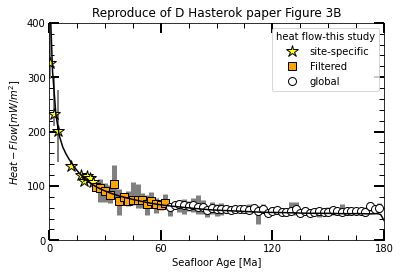

In [11]:

# Plotting
# Site- specific data points
plt.plot(Site_Age_Min,Site_Corrected_Q2,'ok',marker='*', markerfacecolor='yellow', markersize=12, markeredgecolor="black")
# Filtered data points
plt.plot(Filtered_Age_Min,Filtered_Corrected_Q2,'ok',marker='s', markerfacecolor='orange', markersize=8, markeredgecolor="black")
# Unfiltered data points
plt.plot(UnFiltered_Age_Min,UnFiltered_Corrected_Q2,'ok',marker='o', markerfacecolor='white', markersize=8, markeredgecolor="black")
# Polynomial fit for the GDHI model
#fit_fn=np.poly1d(fit)
#scat=plt.plot( GDHI_Age_Min,fit_fn(GDHI_Age_Min), 'black' )
# Error bars for site_specific data with less elinewidth
plt.errorbar(x1,y1 , yerr= (yminus_site,yplus_site),ecolor='gray',linestyle='dashed', color='white', linewidth= 0, elinewidth=2.0)
# Error bars for rest of the  data with higher elinewidth
plt.errorbar(x2,y2 , yerr= (yminus_rest,yplus_rest),ecolor='gray',linestyle='dashed', color='white', linewidth= 0, elinewidth=5.0)
# Fit GDHI plate model
polynomial_coeff=np.polyfit(GDHI_Age_Min,GDHI_Q,20)
polynomial_coeff
xnew=np.linspace(0,180,100)
ynew=np.poly1d(polynomial_coeff)
plt.plot(xnew,ynew(xnew),GDHI_Age_Min,GDHI_Q,'o',markersize=0,color='black')
# Additional ploting steps
plt.xlim(0, 180)
plt.ylim(0, 400)
# Minorticks on
plt.minorticks_on()
# Format ticks
plt.tick_params(which='major', length=10, width=2, direction='in',bottom = True,top =True , right = True,left = True,)
plt.tick_params(which='minor', length=5, width=1, direction='in',bottom = True,top =True , right = True,left = True)
plt.xticks(np.arange(0,181, 60.0))
plt.yticks(np.arange(0,401, 100.0))
# Legend and all
plt.legend(['site-specific','Filtered','global'],title="heat flow-this study")
plt.xlabel('Seafloor Age [Ma]')
plt.ylabel( r'$Heat-Flow [mW/m^{2}]$')
plt.title('Reproduce of D Hasterok paper Figure 3B')
plt.show()